<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/5_DeZero%EC%9D%98_%EB%8F%84%EC%A0%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step 53

모델 저장 및 읽어오기

* 이번 단계에서는 모델이 가지는 매개변수를 외부 파일로 저장하고 다시 읽어오는 기능을 만든다.
* 이런 기능이 있다면 학습 중인 모델의 '스냅샷'을 저장하거나 이미 학습된 매개변수를 읽어와서 추론만 수행할 수 있다.
* DeZero의 매개변수는 Parameter 클래스로 구현되어 있다. (Varaible 클래스를 상속한 클래이이다.)
* 그리고 Parameter의 데이터는 인스턴스 변수 data에 ndarray 인스턴스로 보관된다.
* 따라서 우리가 할 일은 ndarray 인스턴스를 외부 파일로 저장하는 것이다.
* 다행이 넘파이에는 ndarray를 파일로 저장하고 읽어오는 함수가 몇 개 준비되어 있으니 먼저 이 함수들의 사용법을 알아보자.



* DeZero를 GPU에서 실행하는 경우에는 넘파이의 ndarray 대신 쿠파이의 ndarray를 사용한다.
* 이럴 때는 쿠파이 텐서를 넘파이 텐서로 변환한 후 외부 파일로 저장하면 된다.

In [1]:
!git clone https://github.com/GoGiants1/dl-from-scratch-3.git
import sys
sys.path.append('dl-from-scratch-3')



Cloning into 'dl-from-scratch-3'...
remote: Enumerating objects: 2327, done.
remote: Counting objects: 100% (2327/2327), done.
remote: Compressing objects: 100% (852/852), done.
remote: Total 2327 (delta 1503), reused 2287 (delta 1463), pack-reused 0 (from 0)
Receiving objects: 100% (2327/2327), 33.93 MiB | 26.79 MiB/s, done.
Resolving deltas: 100% (1503/1503), done.


넘파이의 save 함수와 load 함수

* 넘파이에는 np.save와 np.load라는 함수가 있다.

In [4]:
import numpy as np

x = np.array([1, 2, 3])
np.save('test.npy', x)

x = np.load('test.npy')
print(x)

[1 2 3]


* np.save 함수부터 봐보자.
* 이 함수는 ndarray 인스턴스를 외부 파일로 저장해준다.
* 이미 저장되어 있는 데이터를 읽어올 때는 np.load 함수를 사용한다.
* 이것으로 하나의 ndarray 인스턴스를 저장하고 읽어올 수 있음을 확인했다.

* 앞의 코드에서 데이터를 test.npy라는 파일로 저장했다. 이 예시처럼 확장자는 .npy로 해주는 게 좋다. 만약 확장자를 생략하면 자동으로 .npy가 뒤에 추가된다.

* 이어서 여러 개의 ndarray 인스턴스를 저장하고 읽어오는 방법을 살펴보자.

In [6]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])

np.savez('test.npz', x1=x1, x2=x2)

arrays = np.load('test.npz')
x1 = arrays['x1']
x2 = arrays['x2']
print(x1)
print(x2)


[1 2 3]
[4 5 6]


* 이때 x1=x1, x2=x2처럼 '키워드 인수'를 지정할 수 있다.
* 이렇게 해두면 데이터를 읽을 때 arrays['x1'], arrays['x2']처럼 원하는 키워드를 명시하여 해당 데이터만 꺼내올 수 있다.
* 그리고 np.savez 함수로 저장하는 파일의 확장자는 .npz로 해준다.

In [7]:
x1 = np.array([1, 2, 3])
x2 = np.array([4, 5, 6])
data = {'x1':x1, 'x2':x2} # 키워드를 파이썬 딕셔너리로 묶음

np.savez('test.npz', **data)

arrays = np.load('test.npz')
x1 = arrays['x1']
x2 = arrays['x2']
print(x1)
print(x2)

[1 2 3]
[4 5 6]


* 이와 같이 np.savez('test.npz', **data) 코드로 데이터를 저장할 수 있다.
* 이 코드에서처럼 딕셔너리 타입의 인수를 전달할 때 **data와 같이 앞에 별표 두 개를 붙여주면 딕셔너리가 자동으로 전개되어 전달된다.
* 이어서 방금 설명한 함수들을 이용하여 DeZero 매개변수를 외부 파일로 저장하는 기능을 만든다.
* Layer 클래스 안의 Parameter를 '평탄화'하여 꺼낸다.


Layer 클래스의 매개변수를 평평하게

In [ ]:
layer = Layer()

l1 = Layer()
l1.p1 = Parameter(np.array(1))

layer.l1 = l1
layer.p2 = Parameter(np.array(2))
layer.p3 = Parameter(np.array(3))

* layer에 또 다른 계층인 l1을 넣었다.

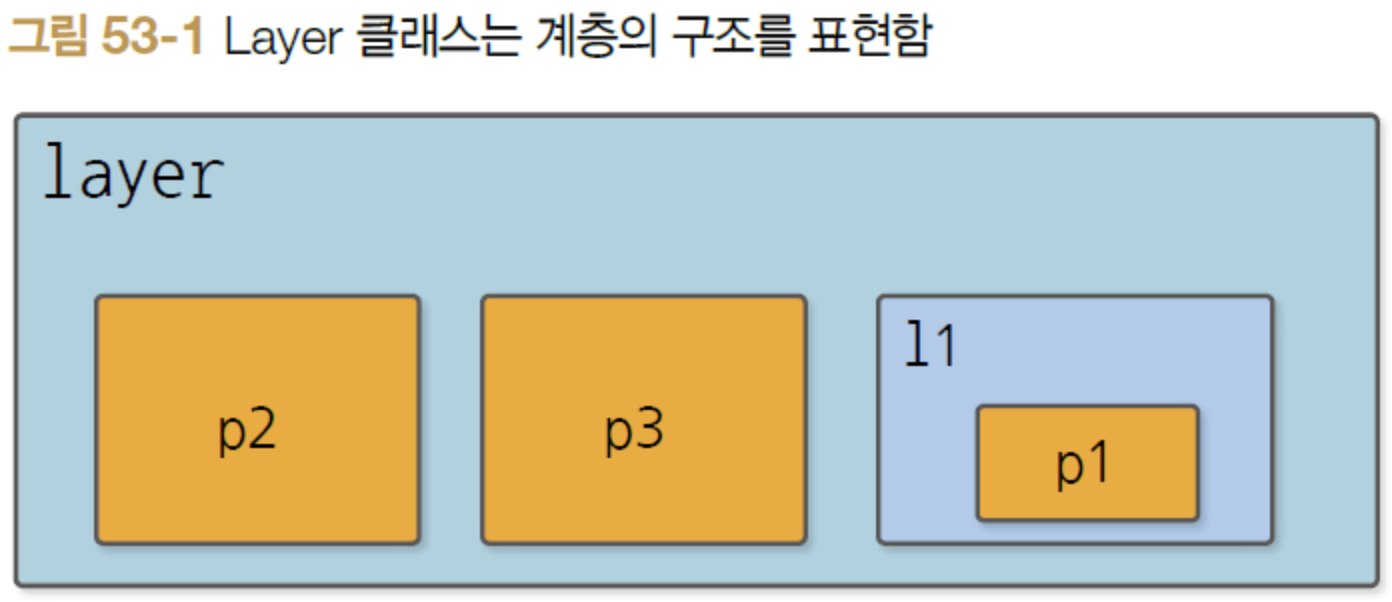

* 위 그림과 같이 같은 계층 구조로부터 Parameter를 '하나의 평탄한 딕셔너리'로, 즉 중첩되지 않은 딕셔너리로 뽑아내려면 어떻게 해야할까?
* 이를 위해 Layer 클래스에 _flatten_params 메서드에 추가한다.

In [ ]:
params_dict = {}
layer._flatten_params(params_dict)
print(params_dict)

* params_dict = {}로 딕셔너리를 만들어 layer._flatten_params(params_dict)로 건네준다.
* 그러면 layer에 포함된 매개변수가 '평탄화'되어 나온다.
* 출력결과를 보면 l1 계층 안의 매개변수 p1은 l1/p1이라는 키로 저장되어 있음을 알수 있다.

In [ ]:
   def _flatten_params(self, params_dict, parent_key=""):
        for name in self._params:
            obj = self.__dict__[name]
            key = parent_key + '/' + name if parent_key else name

            if isinstance(obj, Layer):
                obj._flatten_params(params_dict, key)
            else:
                params_dict[key] = obj

* 이 메서드는 인수로 딕셔너리인 params_dict와 텍스트인 parent_key를 받는다.
* 참고로 Layer 클래스의 인스턴스 변수인 _params에는 'Parameter의 인스턴스 변수 이름' 또는 'Layer의 인스턴스 변수이름'이 담겨 있다.
* 따라서 실체 객체는 obj = self.__dict__[name]으로 꺼내야한다.
* 그리고 꺼낸 obj가 Layer라면 obj의 __flatten_params 메서드를 호출한다.

Layer 클래스의 save 함수와 load 함수

* Layer 클래스의 매개변수를 외부 파일로 저장할 준비가 되어있다.

In [ ]:
    def save_weights(self, path):
            self.to_cpu()

            params_dict = {}
            self._flatten_params(params_dict)
            array_dict = {key: param.data for key, param in params_dict.items()
                          if param is not None}
            try:
                np.savez_compressed(path, **array_dict)
            except (Exception, KeyboardInterrupt) as e:
                if os.path.exists(path):
                    os.remove(path)
                raise

    def load_weights(self, path):
        npz = np.load(path)
        params_dict = {}
        self._flatten_params(params_dict)
        for key, param in params_dict.items():
            param.data = npz[key]

* save_weight 메서드는 먼저 self.to_cpu()를 호출하여 데이터가 메인 메모리에 존재함을 (데이터가 넘파이 ndaray임을) 보장한다.
* 그리고 ndarray 인스턴스를 값으로 갖는 딕셔너리 array_dict를 만든다.
* 그런 다음 np.savez_compressed 함수를 호출하여 데이터를 외부 파일로 저장한다.
* 한편 load_weight 메서드는 np.load 함수로 데이터를 읽어 들인 후 대응하는 키 데이터를 매개변수로 설정한다.

* 앞의 코드에서 파일을 저장할 때 try 구문을 사용했다.
* 사용자에 의해 발생하는 ctrl + c 등의 키워드 인터럽트에 대비한 보호 코드이다.
* 이 try 구문 덕분에 저장 도중 인터럽트가 발생하면 파일은 삭제된다.

In [ ]:
import dezero
import dezero.functions as F
from dezero import optimizers
from dezero import DataLoader
from dezero.models import MLP


max_epoch = 3
batch_size = 100

train_set = dezero.datasets.MNIST(train=True)
train_loader = DataLoader(train_set, batch_size)
model = MLP((1000, 10))
optimizer = optimizers.SGD().setup(model)

# 매개변수 읽기
if os.path.exists('my_mlp.npz'):
    model.load_weights('my_mlp.npz') #2

for epoch in range(max_epoch):
    sum_loss = 0

    for x, t in train_loader:
        y = model(x)
        loss = F.softmax_cross_entropy(y, t)
        model.cleargrads()
        loss.backward()
        optimizer.update()
        sum_loss += float(loss.data) * len(t)

    print('epoch: {}, loss: {:.4f}'.format(
        epoch + 1, sum_loss / len(train_set)))

# 매개변수 저장하기
model.save_weights('my_mlp.npz') #1

* 이 코드를 처음 실행하면 언제나처럼 모델의 매개변수를 무작위로 초기화한 상태에서 학습을 시작한다.
* 마지막 줄에서 학습된 매개변수들이 저장된다.

* 그리고 다음번에 실행하면 my_mlp.npz 파일이 존재하므로 파일로부터 매개변수들을 읽어 들인다.